#### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

Ans.

Min-Max scaling, also known as Normalization, is a data preprocessing technique that scales features to a specific range, typically between 0 and 1.

**Use of  Min-Max Scaling**  
- Feature Scaling for Machine Learning: Many algorithms, such as k-NN, SVM, and Gradient Descent-based methods, rely on distances between points. If one feature has a much larger range than others, it can dominate the model, leading to poor performance. Min-Max scaling ensures that all features contribute equally.
- Preserves Distribution Shape: Unlike Standardization, Min-Max scaling does not alter the shape of the data distribution, it only scales it to a specific range.
- Improves Model Convergence: For algorithms like neural networks, scaling can speed up convergence by ensuring features are on the same scale.

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

age_data = np.array([18, 25, 32, 45, 60]).reshape(-1, 1)

scaler = MinMaxScaler()

age_scaled = scaler.fit_transform(age_data)

print("Original Age Data:", age_data.flatten())
print("Scaled Age Data:", age_scaled.flatten())


Original Age Data: [18 25 32 45 60]
Scaled Age Data: [0.         0.16666667 0.33333333 0.64285714 1.        ]


---

#### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

Ans.

The Unit Vector Scaling technique, also known as Vector Normalization, scales a feature vector such that its magnitude (or length) becomes 1. This is done by dividing each feature value by the Euclidean norm (or the length) of the vector.

**Difference Between Unit Vector Scaling and Min-Max Scaling:**  

Min-Max Scaling:
- Scales each feature individually to a fixed range (e.g., [0, 1]).
- Does not preserve the magnitude of the vector.
- It is applied feature-wise, meaning it scales each feature independently based on its minimum and maximum values.

Unit Vector Scaling:
- Normalizes the entire vector to a unit vector with a magnitude of 1.
- Preserves direction, but the actual values of the features are scaled based on the entire feature vector's magnitude.
- It is applied vector-wise, meaning it scales the entire row of feature values (the instance) rather than individual features.

In [2]:
import numpy as np
from sklearn.preprocessing import normalize

data = np.array([[2, 3, 4]])

normalized_data = normalize(data, norm='l2')

print("Original Data:", data)
print("Unit Vector Scaled Data:", normalized_data)

Original Data: [[2 3 4]]
Unit Vector Scaled Data: [[0.37139068 0.55708601 0.74278135]]


---

#### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

Ans.

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that transforms a dataset with many correlated features into a set of uncorrelated features called principal components. PCA achieves this by projecting the data onto a set of orthogonal axes that maximize the variance, allowing us to reduce the number of dimensions while preserving as much of the data's variability as possible.

**How PCA Works:**  

1.Standardize the Data:  
  - PCA is sensitive to the scale of the data, so it's important to normalize or standardize the dataset before applying PCA (especially if the features have different units or scales).

2.Compute the Covariance Matrix:
- The covariance matrix captures how each feature correlates with every other feature in the dataset.

3.Compute Eigenvalues and Eigenvectors: 
- Eigenvalues determine the magnitude of variance captured by each principal component.
- Eigenvectors represent the directions of these principal components.

4.Sort Eigenvectors by Eigenvalues:
- The eigenvector with the largest eigenvalue corresponds to the first principal component (the direction that captures the most variance).
- The second eigenvector, with the second-largest eigenvalue, corresponds to the second principal component, and so on.

5.Select the Top k Principal Components:  
- Choose the top k components based on the explained variance and construct a new matrix that only includes those components.

6.Project the Data onto the New Principal Component Space:
- The original data is projected onto the top k principal components, reducing the dimensionality.

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data (sq.ft, Bedrooms, Bathrooms, Age of House)
data = np.array([[2000, 3, 2, 10],
                 [1500, 2, 1, 15],
                 [1800, 3, 2, 8],
                 [2200, 4, 3, 5],
                 [1700, 2, 2, 12]])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)  # Reduce to 2 components for visualization
data_pca = pca.fit_transform(data_scaled)

print("Original Data:\n", data)
print("\nTransformed Data (2 Principal Components):\n", data_pca)
print("\nExplained Variance Ratios:", pca.explained_variance_ratio_)

Original Data:
 [[2000    3    2   10]
 [1500    2    1   15]
 [1800    3    2    8]
 [2200    4    3    5]
 [1700    2    2   12]]

Transformed Data (2 Principal Components):
 [[ 4.65444307e-01 -2.04567273e-01]
 [-2.76246894e+00 -3.62788496e-01]
 [ 3.46816336e-01 -1.87482426e-01]
 [ 3.07030390e+00  8.43743774e-04]
 [-1.12009559e+00  7.53994450e-01]]

Explained Variance Ratios: [0.93247674 0.03885606]


---

#### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

Ans.

**Relationship Between PCA and Feature Extraction**  
- PCA (Principal Component Analysis) is often used as a method for feature extraction. Feature extraction involves transforming the original set of features (variables) into a new set of features that are more informative and, ideally, less redundant. PCA does this by combining the original features into a smaller set of new features (principal components) that capture the most significant variance in the data.  
- In essence, PCA is a linear feature extraction technique because it identifies the directions (or axes) in the data space where the variance is maximized. The new features (principal components) are linear combinations of the original features.



**PCA Can Be Used for Feature Extraction:**  
- Dimensionality Reduction: PCA reduces the dimensionality of the dataset while preserving the most important information. The first few principal components generally capture most of the variance in the data, so these components can be used as a compressed set of features.  
- New Features (Principal Components): The principal components (PCs) are new features derived from the original features, and they are ordered by the amount of variance they explain. By selecting the top k principal components, you effectively extract a reduced set of features that can be used for further analysis or modeling.
- Data Transformation: The process of PCA transforms the original data into the space defined by the principal components, thereby creating new features for the dataset that are orthogonal (uncorrelated) to each other. These new features are often more informative for downstream tasks like classification or regression.

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Original data (Size, Bedrooms, Bathrooms, Age of House)
data = np.array([[2000, 3, 2, 10],
                 [1500, 2, 1, 15],
                 [1800, 3, 2, 8],
                 [2200, 4, 3, 5],
                 [1700, 2, 2, 12]])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)  # Extract 2 principal components
data_pca = pca.fit_transform(data_scaled)

print("Original Data:\n", data)
print("\nTransformed Data (PCA Extracted Features):\n", data_pca)
print("\nExplained Variance Ratios:", pca.explained_variance_ratio_)


Original Data:
 [[2000    3    2   10]
 [1500    2    1   15]
 [1800    3    2    8]
 [2200    4    3    5]
 [1700    2    2   12]]

Transformed Data (PCA Extracted Features):
 [[ 4.65444307e-01 -2.04567273e-01]
 [-2.76246894e+00 -3.62788496e-01]
 [ 3.46816336e-01 -1.87482426e-01]
 [ 3.07030390e+00  8.43743774e-04]
 [-1.12009559e+00  7.53994450e-01]]

Explained Variance Ratios: [0.93247674 0.03885606]


---

#### Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

Ans.

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = {
    'Restaurant': ['A', 'B', 'C', 'D', 'E'],
    'Price (USD)': [10, 20, 15, 12, 18],
    'Rating': [4.5, 3.8, 4.2, 4.7, 4.0],
    'Delivery Time (mins)': [30, 45, 25, 35, 40]
}

df = pd.DataFrame(data)

scaler = MinMaxScaler()

df[['Price (Scaled)', 'Rating (Scaled)', 'Delivery Time (Scaled)']] = scaler.fit_transform(
    df[['Price (USD)', 'Rating', 'Delivery Time (mins)']])

print(df)

  Restaurant  Price (USD)  Rating  Delivery Time (mins)  Price (Scaled)  \
0          A           10     4.5                    30             0.0   
1          B           20     3.8                    45             1.0   
2          C           15     4.2                    25             0.5   
3          D           12     4.7                    35             0.2   
4          E           18     4.0                    40             0.8   

   Rating (Scaled)  Delivery Time (Scaled)  
0         0.777778                    0.25  
1         0.000000                    1.00  
2         0.444444                    0.00  
3         1.000000                    0.50  
4         0.222222                    0.75  


---

#### Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

Ans.

Transformed Data (2 Principal Components):
[[-3.76588037e+00 -5.64043454e-01]
 [-2.23210490e+00  7.19519088e-01]
 [ 2.55301949e-16 -5.39701994e-16]
 [ 1.99932842e+00 -5.18252113e-02]
 [ 3.99865685e+00 -1.03650423e-01]]

Explained Variance Ratio:
[0.97876795 0.02123205]


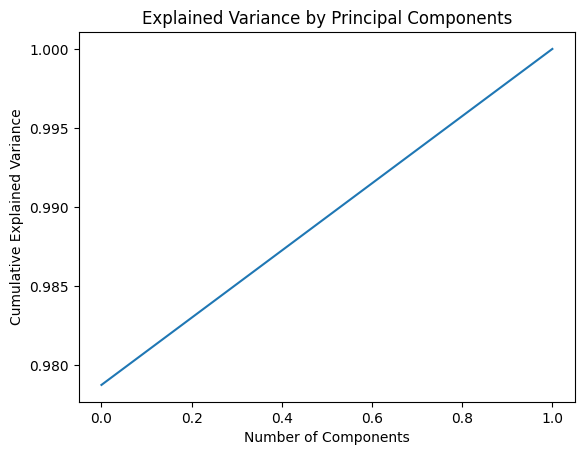

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

data = {
    'Revenue': [100, 200, 300, 400, 500],
    'Profit Margin': [0.1, 0.15, 0.2, 0.25, 0.3],
    'Debt': [50, 60, 70, 80, 90],
    'Assets': [150, 160, 170, 180, 190],
    'Stock Index': [1200, 1250, 1300, 1350, 1400],
    'Interest Rate': [2.5, 2.4, 2.6, 2.7, 2.8],
    'Moving Average': [25, 30, 35, 40, 45],
    'RSI': [55, 60, 65, 70, 75]
}

df = pd.DataFrame(data)

# Step 1: Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Apply PCA (Let's say we want to reduce the data to 2 principal components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 3: Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Step 4: Display the reduced data (principal components) and the explained variance
print("Transformed Data (2 Principal Components):")
print(pca_result)

print("\nExplained Variance Ratio:")
print(explained_variance)

# Step 5: Optionally, plot the cumulative explained variance to determine how many components to keep
import matplotlib.pyplot as plt

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

---

#### Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

Ans.

In [7]:
import numpy as np

X = np.array([1, 5, 10, 15, 20])

X_min, X_max = X.min(), X.max()

a, b = -1, 1

X_scaled = ((X - X_min) / (X_max - X_min)) * (b - a) + a
X_scaled

array([-1.        , -0.57894737, -0.05263158,  0.47368421,  1.        ])

---

#### Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

Ans.

In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
data = pd.DataFrame({
    "Height": np.random.normal(170, 10, 100),  # Mean 170 cm, std 10 cm
    "Weight": np.random.normal(70, 15, 100),   # Mean 70 kg, std 15 kg
    "Age": np.random.randint(20, 80, 100),     # Random ages between 20-80
    "Gender": np.random.choice([0, 1], 100),   # Binary gender (0: Female, 1: Male)
    "Blood Pressure": np.random.normal(120, 15, 100)  # Mean 120 mmHg, std 15
})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(explained_variance >= 0.95) + 1

print(f"Explained Variance Ratio: {explained_variance}")
print(f"Number of Principal Components to Retain 95% Variance: {n_components}")

Explained Variance Ratio: [0.25541357 0.49712166 0.69833966 0.87609217 1.        ]
Number of Principal Components to Retain 95% Variance: 5
